In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qcodes as qc
from qcodes.instrument_drivers.nplab_drivers.Keithley_2182a import Keithley_2182a
from qcodes.instrument_drivers.nplab_drivers.Keithley_6221 import Keithley_6221
import time

C:\Users\nplab\Anaconda3\envs\qcodes\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
k6 = Keithley_6221('k6', 'GPIB::12::INSTR')

Connected to: KEITHLEY INSTRUMENTS INC. 6221 (serial:4307474, firmware:D03  /700x) in 0.11s


In [3]:
%matplotlib notebook
station = qc.Station(k6)

In [4]:
from pprint import pprint
pprint(k6.snapshot())

{'__class__': 'qcodes.instrument_drivers.nplab_drivers.Keithley_6221.Keithley_6221',
 'address': 'GPIB::12::INSTR',
 'functions': {'abort_arm': {}, 'get_error': {}, 'reset': {}},
 'name': 'k6',
 'parameters': {'IDN': {'__class__': 'qcodes.instrument.parameter.Parameter',
                        'full_name': 'k6_IDN',
                        'instrument': 'qcodes.instrument_drivers.nplab_drivers.Keithley_6221.Keithley_6221',
                        'instrument_name': 'k6',
                        'inter_delay': 0,
                        'label': 'IDN',
                        'name': 'IDN',
                        'post_delay': 0,
                        'raw_value': {'firmware': 'D03  /700x',
                                      'model': '6221',
                                      'serial': '4307474',
                                      'vendor': 'KEITHLEY INSTRUMENTS INC.'},
                        'ts': '2018-01-23 18:57:06',
                        'unit': '',
                

In [3]:
k6.k2_nplc(1) # relaying to 2182a works, but getting doesn't work yet

In [5]:
k6.current.inter_delay = 0.5

# Tests from - to +, with delta differential conductance mode on a 10 $\Omega$ resistor at room temperature

First with -100 to +100 $\mu A$, step = 1 $\mu A$, delay = 0.5 s (because there are more steps required per data point), delta = 1 $\mu A$

In [5]:
k6.current.step = 50e-6
start = -100e-6
stop = 100e-6
step = 1e-6
delta = 10e-6
delay = 0.5
k6.current(start)
k6.unit('OHMS')

In [6]:
k6.delta_diff_setup(start, stop, step, delta, delay)

C:\Users\nplab\Anaconda3\envs\qcodes\lib\site-packages\qcodes\qcodes\instrument\parameter.py:209: UserWarning: Wrapping get method, original get method will not be directly accessible. It is recommended to define get_raw in your subclass instead.
  warnings.warn('Wrapping get method, original get method will not '


In [7]:
meas = qc.Measure(k6.deltadcon)
data = meas.get_data_set()
meas.run()
k6.abort_arm()
plot = qc.QtPlot(data.k6_deltadcon)

DataSet:
   location = 'data/2018-01-23/#018_{name}_15-39-48'
   <Type>   | <array_id>   | <array.name> | <array.shape>
   Measured | k6_deltadcon | deltadcon    | (201,)
acquired at 2018-01-23 15:41:37


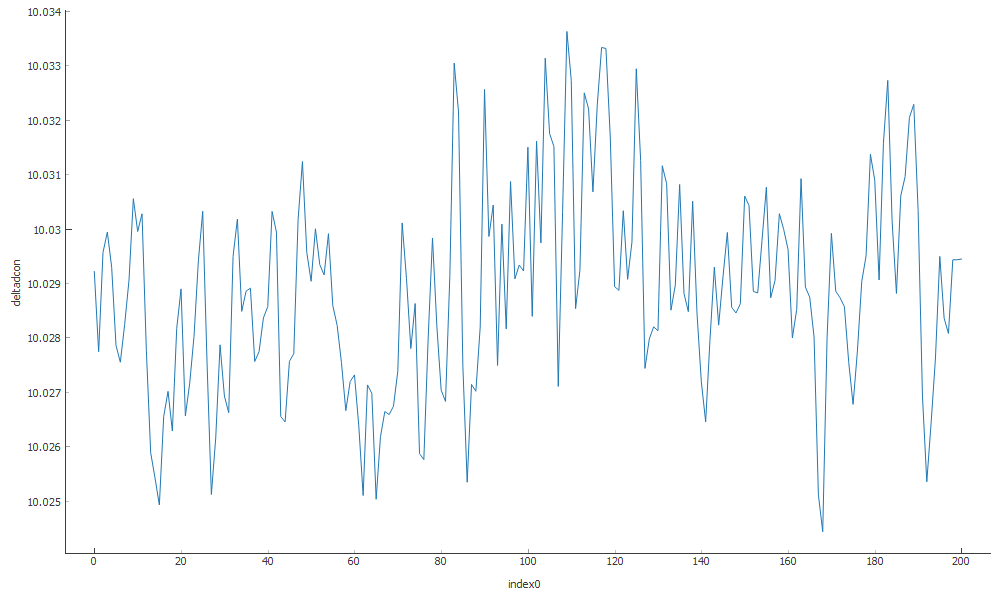

In [8]:
plot

<IPython.core.display.Javascript object>


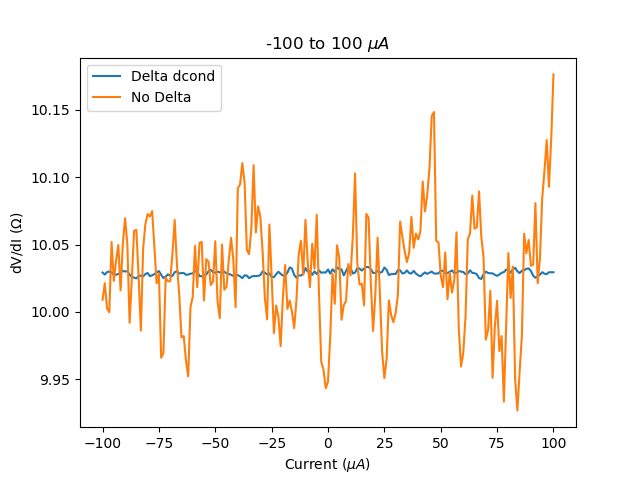

In [9]:
dVdI1 = np.array(data.k6_deltadcon)
npoints = int(np.abs(stop-start)/step+1)
I1 = np.linspace(start, stop, npoints)*10**6
dnd1 = np.loadtxt('dvdi100uAnodelta')
dVdI1nd = dnd1[:,1]
I1nd = dnd1[:,0]

plt.figure()
plt.plot(I1, dVdI1, label='Delta dcond')
plt.plot(I1nd,dVdI1nd, label='No Delta')
plt.ylabel('dV/dI ($\Omega$)')
plt.xlabel('Current ($\mu A$)')
plt.legend()
plt.title('-100 to 100 $\mu A$')

In [20]:
print('Standard deviation of dV/dI with delta: {}'.format(np.std(dVdI1)))
print('Standard deviation of dV/dI without delta: {}'.format(np.std(dVdI1nd)))

Standard deviation of dV/dI with delta: 0.001889717109202808
Standard deviation of dV/dI without delta: 0.04171145666024833


Now with -10 to 10 $\mu A$, step 0.1 $\mu A$, delay 0.5 s, delta 0.1 $\mu A$

In [16]:
start = -10e-6
stop = 10e-6
step = 0.1e-6
delta = 0.1e-6
delay = 0.5
k6.current(start)
k6.unit('OHMS')

In [17]:
k6.delta_diff_setup(start, stop, step, delta, delay)

C:\Users\nplab\Anaconda3\envs\qcodes\lib\site-packages\qcodes\qcodes\instrument\parameter.py:209: UserWarning: Wrapping get method, original get method will not be directly accessible. It is recommended to define get_raw in your subclass instead.
  warnings.warn('Wrapping get method, original get method will not '


DataSet:
   location = 'data/2018-01-23/#020_10uAdeltadIdV_15-55-38'
   <Type>   | <array_id>   | <array.name> | <array.shape>
   Measured | k6_deltadcon | deltadcon    | (201,)
acquired at 2018-01-23 15:57:27


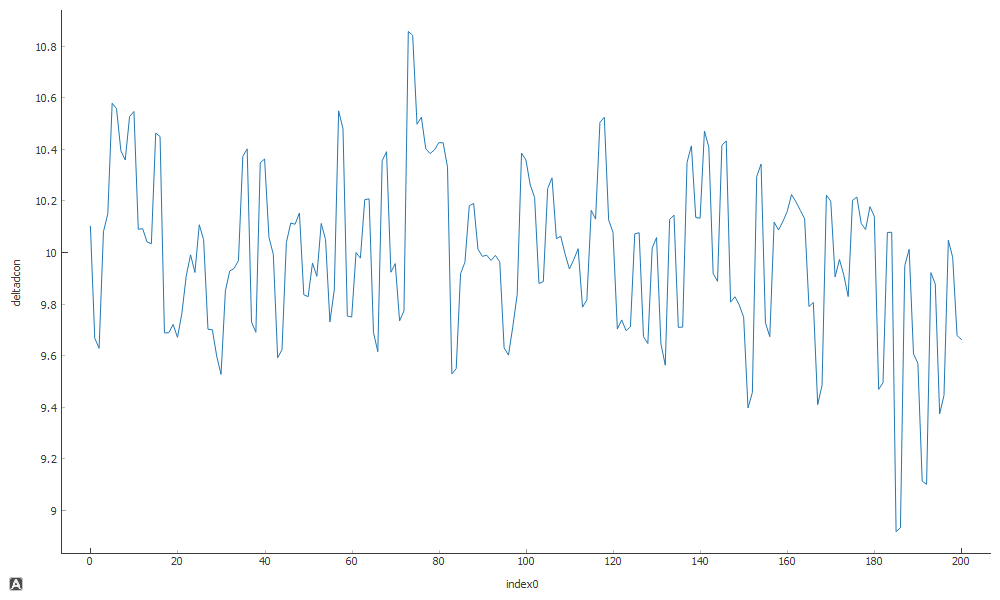

In [18]:
meas = qc.Measure(k6.deltadcon)
data2 = meas.get_data_set(name='10uAdeltadIdV')
meas.run()
k6.abort_arm()
plot = qc.QtPlot(data2.k6_deltadcon)
plot

<IPython.core.display.Javascript object>


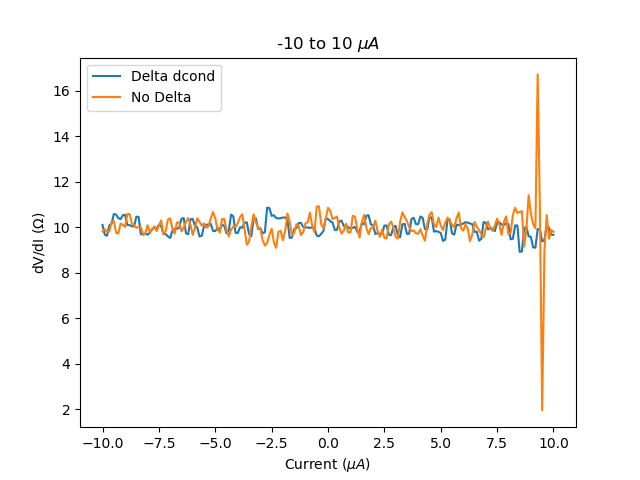

In [19]:
dVdI2 = np.array(data2.k6_deltadcon)
npoints = int(np.abs(stop-start)/step+1)
I2 = np.linspace(start, stop, npoints)*10**6
dnd2 = np.loadtxt('dvdi10uAnodelta')
dVdI2nd = dnd2[:,1]
I2nd = dnd2[:,0]

plt.figure()
plt.plot(I2, dVdI2, label='Delta dcond')
plt.plot(I2nd,dVdI2nd, label='No Delta')
plt.ylabel('dV/dI ($\Omega$)')
plt.xlabel('Current ($\mu A$)')
plt.legend()
plt.title('-10 to 10 $\mu A$')

Try with larger delta as in the 100 $\mu A$ case, so now delta = 1e-6

In [21]:
start = -10e-6
stop = 10e-6
step = 0.1e-6
delta = 1e-6
delay = 0.5
k6.current(start)
k6.unit('OHMS')

In [22]:
k6.delta_diff_setup(start, stop, step, delta, delay)

C:\Users\nplab\Anaconda3\envs\qcodes\lib\site-packages\qcodes\qcodes\instrument\parameter.py:209: UserWarning: Wrapping get method, original get method will not be directly accessible. It is recommended to define get_raw in your subclass instead.
  warnings.warn('Wrapping get method, original get method will not '


DataSet:
   location = 'data/2018-01-23/#021_10uAdeltadIdVhighdelta_16-05-47'
   <Type>   | <array_id>   | <array.name> | <array.shape>
   Measured | k6_deltadcon | deltadcon    | (201,)
acquired at 2018-01-23 16:07:35


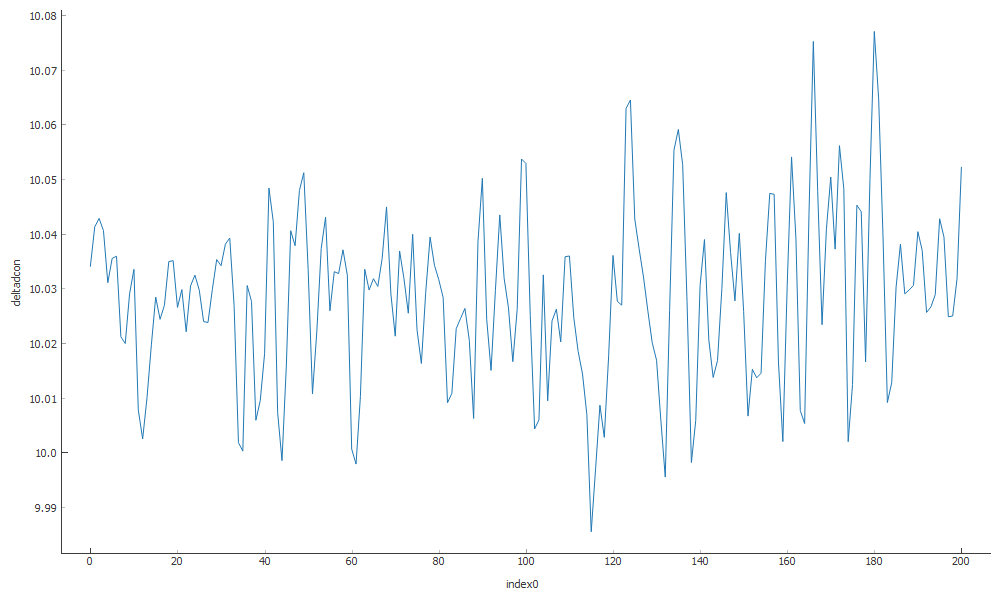

In [23]:
meas = qc.Measure(k6.deltadcon)
data3 = meas.get_data_set(name='10uAdeltadIdVhighdelta')
meas.run()
k6.abort_arm()
plot = qc.QtPlot(data3.k6_deltadcon)
plot

<IPython.core.display.Javascript object>


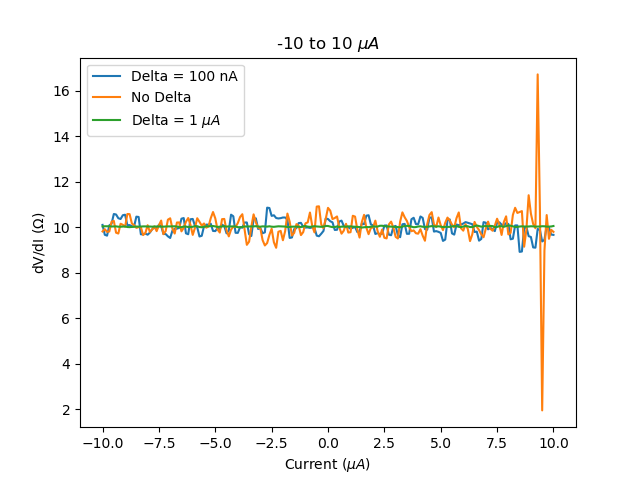

Standard deviation of dV/dI with delta=100 nA: 0.32563100133532663
Standard deviation of dV/dI with delta=1 uA: 0.015570932985687751
Standard deviation of dV/dI without delta: 0.8307273318344276


In [25]:
dVdI3 = np.array(data3.k6_deltadcon)
npoints = int(np.abs(stop-start)/step+1)
I3 = np.linspace(start, stop, npoints)*10**6

plt.figure()
plt.plot(I2, dVdI2, label='Delta = 100 nA')
plt.plot(I2nd,dVdI2nd, label='No Delta')
plt.plot(I3, dVdI3, label='Delta = 1 $\mu A$')
plt.ylabel('dV/dI ($\Omega$)')
plt.xlabel('Current ($\mu A$)')
plt.legend()
plt.title('-10 to 10 $\mu A$')

print('Standard deviation of dV/dI with delta=100 nA: {}'.format(np.std(dVdI2)))
print('Standard deviation of dV/dI with delta=1 uA: {}'.format(np.std(dVdI3)))
print('Standard deviation of dV/dI without delta: {}'.format(np.std(dVdI2nd)))

Now with -100 nA to 100 nA, 1 nA step, 0.5 s delay, 20 nA delta

In [8]:
start = -100e-9
stop = 100e-9
step = 1e-9
delta = 20e-9
delay = 0.5
k6.current(start)
k6.unit('OHMS')

In [9]:
k6.delta_diff_setup(start, stop, step, delta, delay)

C:\Users\nplab\Anaconda3\envs\qcodes\lib\site-packages\qcodes\qcodes\instrument\parameter.py:209: UserWarning: Wrapping get method, original get method will not be directly accessible. It is recommended to define get_raw in your subclass instead.
  warnings.warn('Wrapping get method, original get method will not '


DataSet:
   location = 'data/2018-01-23/#022_100nAdeltadIdV_16-44-05'
   <Type>   | <array_id>   | <array.name> | <array.shape>
   Measured | k6_deltadcon | deltadcon    | (201,)
acquired at 2018-01-23 16:45:54


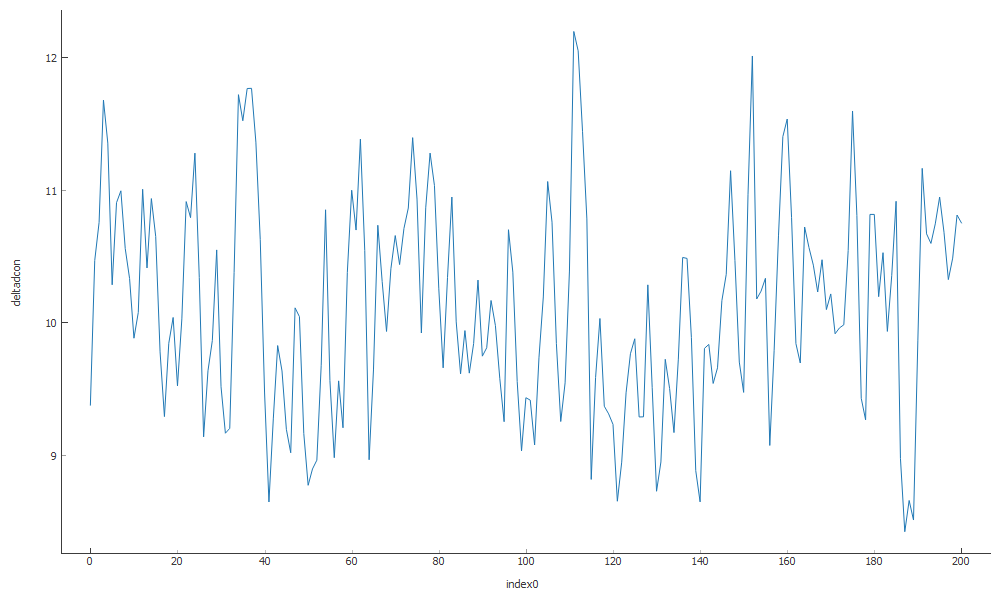

In [10]:
meas = qc.Measure(k6.deltadcon)
data4 = meas.get_data_set(name='100nAdeltadIdV')
meas.run()
k6.abort_arm()
plot = qc.QtPlot(data4.k6_deltadcon)
plot

And with delta 5 nA

In [14]:
delta = 5e-9
k6.delta_diff_setup(start, stop, step, delta, delay)

C:\Users\nplab\Anaconda3\envs\qcodes\lib\site-packages\qcodes\qcodes\instrument\parameter.py:209: UserWarning: Wrapping get method, original get method will not be directly accessible. It is recommended to define get_raw in your subclass instead.
  warnings.warn('Wrapping get method, original get method will not '


DataSet:
   location = 'data/2018-01-23/#023_100nAdeltadIdVlowdelta_16-52-00'
   <Type>   | <array_id>   | <array.name> | <array.shape>
   Measured | k6_deltadcon | deltadcon    | (201,)
acquired at 2018-01-23 16:53:48


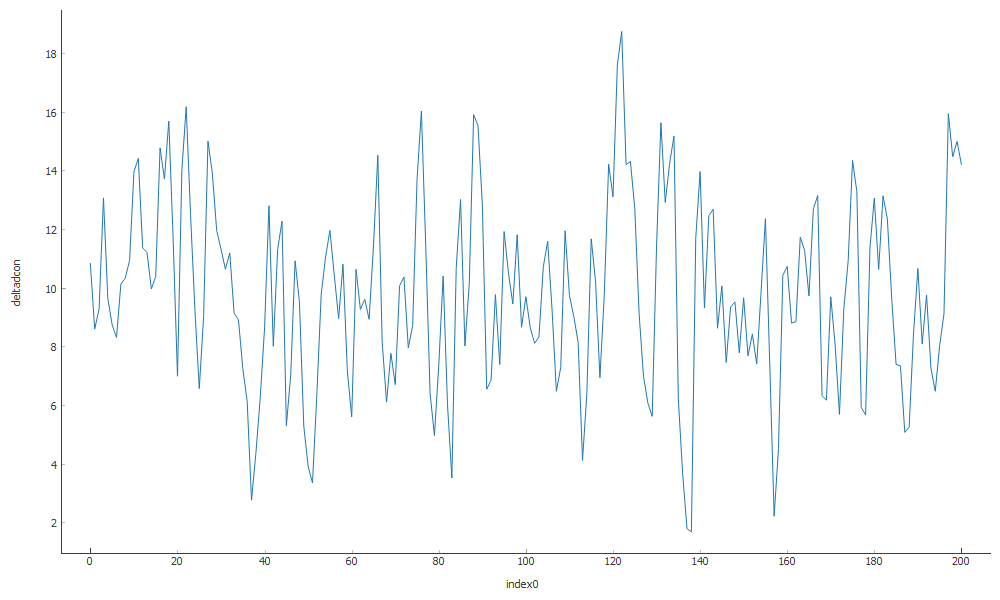

In [15]:
meas = qc.Measure(k6.deltadcon)
data5 = meas.get_data_set(name='100nAdeltadIdVlowdelta')
meas.run()
k6.abort_arm()
plot = qc.QtPlot(data5.k6_deltadcon)
plot

And with delta 1.5 nA

In [17]:
delta = 1.5e-9
k6.delta_diff_setup(start, stop, step, delta, delay)

C:\Users\nplab\Anaconda3\envs\qcodes\lib\site-packages\qcodes\qcodes\instrument\parameter.py:209: UserWarning: Wrapping get method, original get method will not be directly accessible. It is recommended to define get_raw in your subclass instead.
  warnings.warn('Wrapping get method, original get method will not '


DataSet:
   location = 'data/2018-01-23/#024_100nAdeltadIdVlowlowdelta_16-55-33'
   <Type>   | <array_id>   | <array.name> | <array.shape>
   Measured | k6_deltadcon | deltadcon    | (201,)
acquired at 2018-01-23 16:57:22


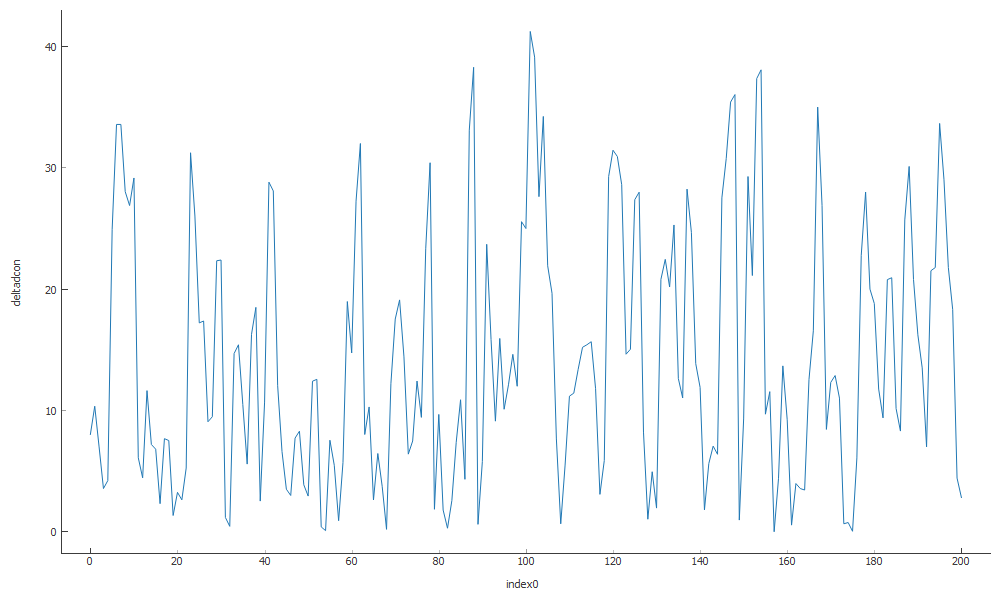

In [18]:
meas = qc.Measure(k6.deltadcon)
data6 = meas.get_data_set(name='100nAdeltadIdVlowlowdelta')
meas.run()
k6.abort_arm()
plot = qc.QtPlot(data6.k6_deltadcon)
plot

<IPython.core.display.Javascript object>


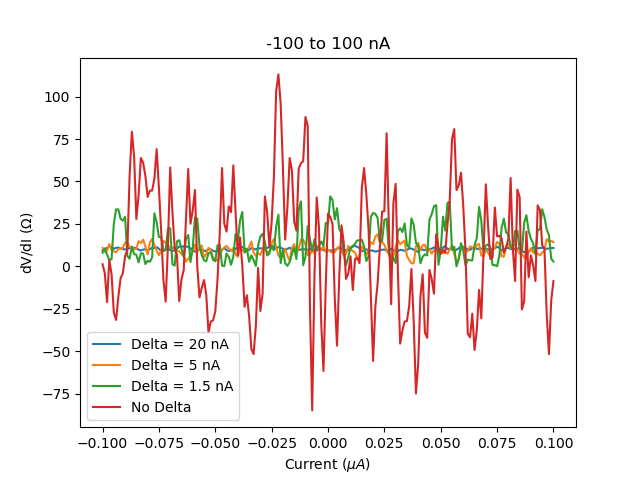

Standard deviation of dV/dI with delta=20 nA: 0.7879317047718604
Standard deviation of dV/dI with delta=5 nA: 3.2070516247567418
Standard deviation of dV/dI with delta=1.5 nA: 10.495109623668572
Standard deviation of dV/dI without delta: 35.9000443334262


In [19]:
dVdI4 = np.array(data4.k6_deltadcon)
npoints = int(round(np.abs(stop-start)/step+1))
I4 = np.linspace(start, stop, npoints)*10**6

dVdI5 = np.array(data5.k6_deltadcon)
I5 = I4

dVdI6 = np.array(data6.k6_deltadcon)
I6 = I4

dnd3 = np.loadtxt('dvdi100nAnodelta')
dVdI3nd = dnd3[:,1]
I3nd = dnd3[:,0]

plt.figure()
plt.plot(I4, dVdI4, label='Delta = 20 nA')
plt.plot(I5, dVdI5, label='Delta = 5 nA')
plt.plot(I6, dVdI6, label='Delta = 1.5 nA')
plt.plot(I3nd,dVdI3nd, label='No Delta')
plt.ylabel('dV/dI ($\Omega$)')
plt.xlabel('Current ($\mu A$)')
plt.legend()
plt.title('-100 to 100 nA')
print('Standard deviation of dV/dI with delta=20 nA: {}'.format(np.std(dVdI4)))
print('Standard deviation of dV/dI with delta=5 nA: {}'.format(np.std(dVdI5)))
print('Standard deviation of dV/dI with delta=1.5 nA: {}'.format(np.std(dVdI6)))
print('Standard deviation of dV/dI without delta: {}'.format(np.std(dVdI3nd)))

# Now try making a 2D plot with the array parameter by varying some other parameter in a loop 

In [4]:
from qcodes.instrument.parameter import ManualParameter

In [5]:
import qcodes.utils.validators as vals

In [6]:
bfield = ManualParameter('bfield', vals=vals.Numbers(-10,10))

In [7]:
bfield(9.87)
bfield()

9.87

In [8]:
start = -10e-6
stop = 10e-6
step = 0.1e-6
delta = 0.5e-6
delay = 0.2
k6.unit('OHMS')

In [10]:
k6.delta_diff_setup(start, stop, step, delta, delay)

C:\Users\nplab\Anaconda3\envs\qcodes\lib\site-packages\qcodes\qcodes\instrument\parameter.py:209: UserWarning: Wrapping get method, original get method will not be directly accessible. It is recommended to define get_raw in your subclass instead.
  warnings.warn('Wrapping get method, original get method will not '


In [11]:
loop = qc.Loop(bfield.sweep(-3, 3, 1)).each(k6.deltadcon)
data2d = loop.get_data_set(name='2dtest')
plot = qc.QtPlot()
plot.add(data2d.k6_deltadcon)
loop.with_bg_task(plot.update, plot.save).run()
k6.abort_arm()

Started at 2018-01-23 18:33:23
DataSet:
   location = 'data/2018-01-23/#027_2dtest_18-33-20'
   <Type>   | <array_id>   | <array.name> | <array.shape>
   Setpoint | bfield_set   | bfield       | (7,)
   Measured | k6_deltadcon | deltadcon    | (7, 201)
Finished at 2018-01-23 18:38:57


<IPython.core.display.Javascript object>


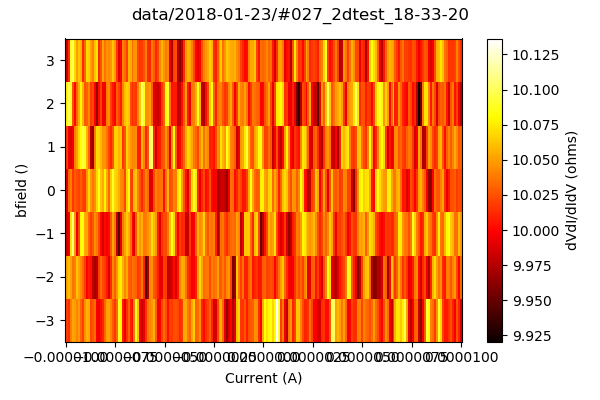

In [12]:
plot = qc.MatPlot(data2d.k6_deltadcon)

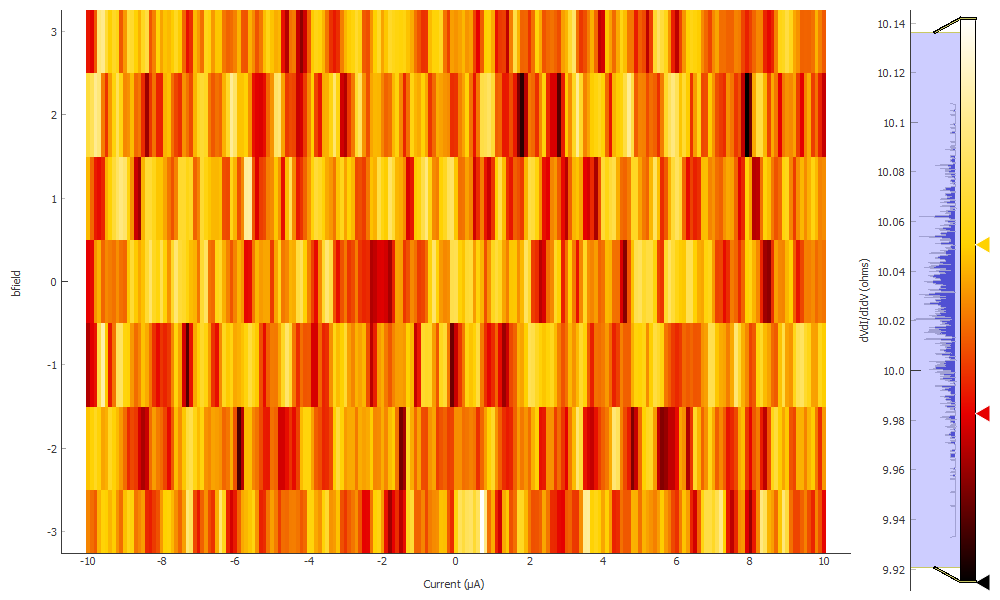

In [13]:
plot2 = qc.QtPlot(data2d.k6_deltadcon)
plot2

In [14]:
data2d.arrays

{
  'bfield_set': DataArray[7]: bfield_set
    array([-3., -2., -1.,  0.,  1.,  2.,  3.])
  'Current_set': DataArray[7,201]: Current_set
    array([[-1.0e-05, -9.9e-06, -9.8e-06, ...,  9.8e-06,  9.9e-06,  1.0e-05],
           [-1.0e-05, -9.9e-06, -9.8e-06, ...,  9.8e-06,  9.9e-06,  1.0e-05],
           [-1.0e-05, -9.9e-06, -9.8e-06, ...,  9.8e-06,  9.9e-06,  1.0e-05],
           ...,
           [-1.0e-05, -9.9e-06, -9.8e-06, ...,  9.8e-06,  9.9e-06,  1.0e-05],
           [-1.0e-05, -9.9e-06, -9.8e-06, ...,  9.8e-06,  9.9e-06,  1.0e-05],
           [-1.0e-05, -9.9e-06, -9.8e-06, ...,  9.8e-06,  9.9e-06,  1.0e-05]])
  'k6_deltadcon': DataArray[7,201]: k6_deltadcon
    array([[10.0263729 , 10.0191774 , 10.0133476 , ..., 10.0264578 ,
            10.01017   ,  9.98684216],
           [10.0455561 , 10.0516148 , 10.0617552 , ..., 10.022459  ,
             9.99897385, 10.0326977 ],
           [ 9.97090435,  9.98453808,  9.99239635, ..., 10.0347795 ,
            10.0597801 , 10.0486231 ],
     

# Lastly, trying a simple test with the timemeas = True

In [9]:
k6.delta_diff_setup(start, stop, step, delta, delay, timemeas=True)

C:\Users\nplab\Anaconda3\envs\qcodes\lib\site-packages\qcodes\qcodes\instrument\parameter.py:209: UserWarning: Wrapping get method, original get method will not be directly accessible. It is recommended to define get_raw in your subclass instead.
  warnings.warn('Wrapping get method, original get method will not '


In [10]:
meas = qc.Measure(k6.deltadcon)
tdata = meas.get_data_set(name='tryingouttime')
meas.run()
k6.abort_arm()

DataSet:
   location = 'data/2018-01-23/#030_tryingouttime_19-21-27'
   <Type>   | <array_id>   | <array.name> | <array.shape>
   Measured | k6_deltadcon | deltadcon    | (2, 201)
acquired at 2018-01-23 19:22:14


In [11]:
tdata.arrays

{
  'index0_set': DataArray[2]: index0_set
    array([0., 1.])
  'index1_set': DataArray[2,201]: index1_set
    array([[-1.00e-05, -9.90e-06, -9.80e-06, -9.70e-06, -9.60e-06, -9.50e-06,
            -9.40e-06, -9.30e-06, -9.20e-06, -9.10e-06, -9.00e-06, -8.90e-06,
            -8.80e-06, -8.70e-06, -8.60e-06, -8.50e-06, -8.40e-06, -8.30e-06,
            -8.20e-06, -8.10e-06, -8.00e-06, -7.90e-06, -7.80e-06, -7.70e-06,
            -7.60e-06, -7.50e-06, -7.40e-06, -7.30e-06, -7.20e-06, -7.10e-06,
            -7.00e-06, -6.90e-06, -6.80e-06, -6.70e-06, -6.60e-06, -6.50e-06,
            -6.40e-06, -6.30e-06, -6.20e-06, -6.10e-06, -6.00e-06, -5.90e-06,
            -5.80e-06, -5.70e-06, -5.60e-06, -5.50e-06, -5.40e-06, -5.30e-06,
            -5.20e-06, -5.10e-06, -5.00e-06, -4.90e-06, -4.80e-06, -4.70e-06,
            -4.60e-06, -4.50e-06, -4.40e-06, -4.30e-06, -4.20e-06, -4.10e-06,
            -4.00e-06, -3.90e-06, -3.80e-06, -3.70e-06, -3.60e-06, -3.50e-06,
            -3.40e-06, -3.30e-06, 

Differential resistance data

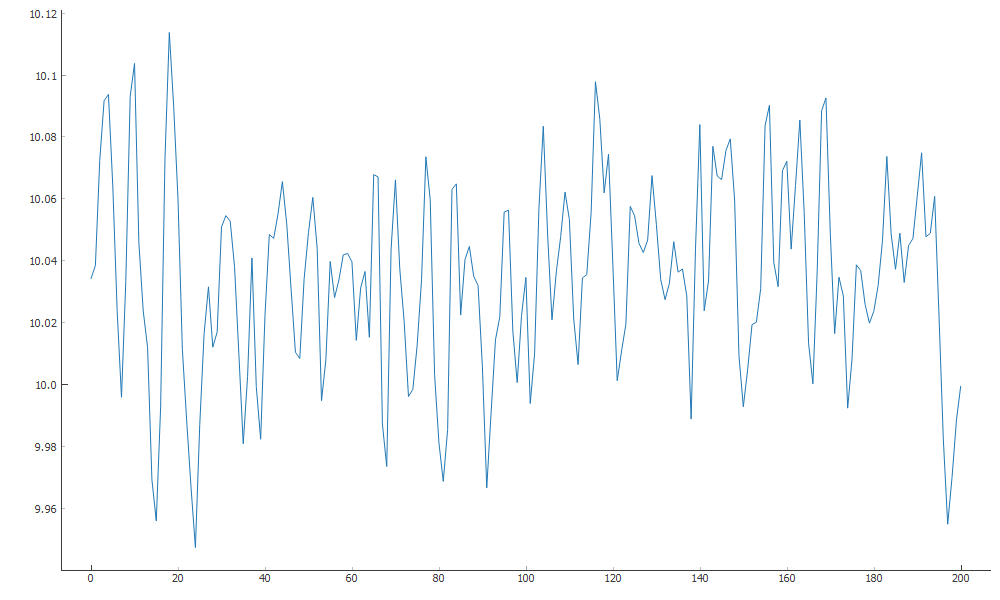

In [12]:
qc.QtPlot(tdata.k6_deltadcon[0,:])

Time data

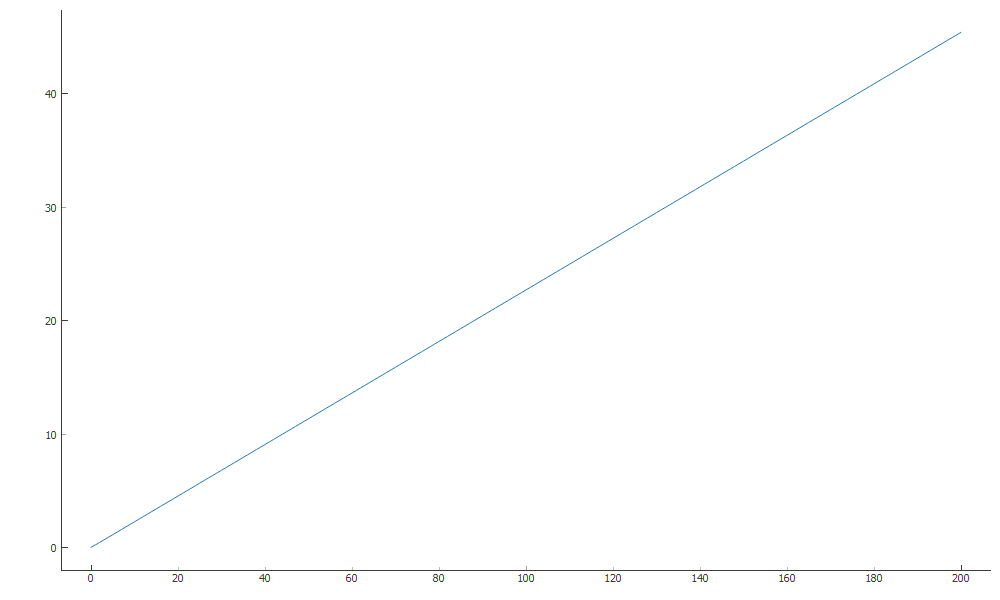

In [13]:
qc.QtPlot(tdata.k6_deltadcon[1,:])

In [16]:
k6.close()